# Car sales analysis
 **Dominika Zogatová**   
 **BI 2020**  
   
 Data source: https://github.com/jbrownlee/Datasets/blob/master/monthly-car-sales.csv

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet # data forcasting
import warnings # ignore warinings

cars = pd.read_excel('monthly_car_sales.xlsx')

cars = pd.DataFrame(cars)

cars.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


# Inspecting the dataset  

There are no missing vaules in the dataset.

In [7]:
print('\n Number of missing values in each column')
cars.isnull().sum(axis = 0) #missing vaules in every column

# df.isnull().sum(axis = 1) #missing values in every row

# cars.dropna(inplace = True) # drop missing values 



 Number of missing values in each column


Month    0
Sales    0
dtype: int64

In [8]:
years = cars['Month'].str.split("-", n = 1, expand = True) # using .str.split() to split every row in a column

cars["Year"] = years[0]

print('\n Summary statistics for each year between 1960 and 1968')
cars.groupby('Year').describe()


 Summary statistics for each year between 1960 and 1968


Sales                                                                   \
     count          mean          std      min       25%      50%       75%   
Year                                                                          
1960  12.0  10186.666667  2811.505011   6550.0   8404.75   9431.0  12467.25   
1961  12.0  10858.083333  2808.015134   7237.0   8605.75  10579.0  13015.25   
1962  12.0  12663.333333  4073.978541   5568.0  10653.50  11808.5  15451.25   
1963  12.0  13826.916667  4106.195064   7962.0  10939.25  13280.0  16406.00   
1964  12.0  15171.083333  4071.063597  10306.0  12134.75  14253.0  18671.75   
1965  12.0  17111.500000  4186.811317  10895.0  14316.50  16870.5  20304.25   
1966  12.0  16728.916667  3306.077997  12674.0  14390.25  15761.5  20012.00   
1967  12.0  16581.333333  4186.834481  11608.0  13557.00  15169.5  20015.25   
1968  12.0  18228.166667  3910.249488  13210.0  14529.00  17602.0  21148.50   

               
          max  
Year           
1960  14587.0  
1961  15926.0  
1962  20900.0  
1963  20379.0  
1964  22015.0  
1965  23541.0  
1966  22135.0  
1967  24081.0  
1968  26099.0

## Plots

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


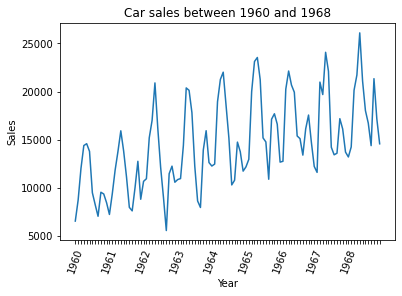

In [9]:
fig, ax = plt.subplots()

plt.plot(cars['Month'], cars['Sales'])
plt.title('Car sales between 1960 and 1968')
plt.xlabel('Year')
plt.ylabel('Sales')

labels = [item.get_text() for item in ax.get_xticklabels()]

# this for loop puts a year label at the beginning of each year
for i in range(9):
    split = cars['Month'][i*12].split("-")
    labels[i*12] = split[0]

    
ax.set_xticklabels(labels)
plt.xticks(rotation=70)

plt.show()

# TO DO: it would be better to change strings cars['Month'] to timestamp data                                    

  
  
# Forcasting time series data
Using the Facebook Prophet to predict future data. For detailed information about `fbprophet` visit https://github.com/facebook/prophet.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

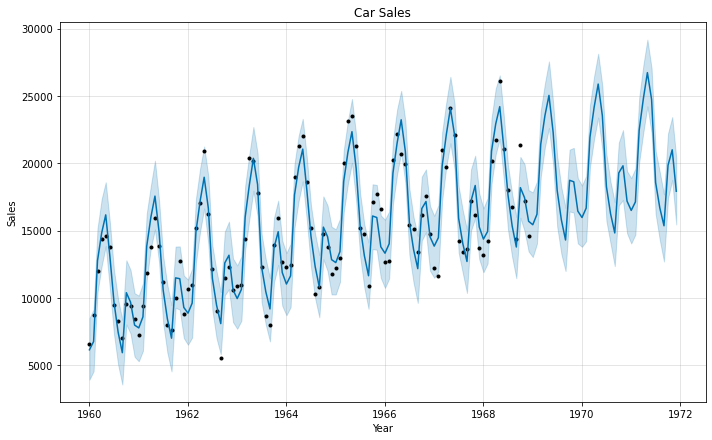

In [10]:
cars.drop(columns=['Year']) # removing column used in summary statistics to prep the df for fbprophet

cars = cars.rename(columns={'Month': 'ds', 'Sales': 'y'}) # to use fbprophet columns must be named 'ds' and 'y'
cars_model = Prophet(interval_width=0.95)
cars_model.fit(cars)

cars_forecast = cars_model.make_future_dataframe(periods=36, freq='MS')
cars_forecast = cars_model.predict(cars_forecast)

plt.figure(figsize=(18, 6))
cars_model.plot(cars_forecast, xlabel = 'Year', ylabel = 'Sales')

plt.title('Car Sales')


plt.show()

# INFO: Prophet automatically detected monthly data and disabled weekly and daily seasonality.